# **Sistem Pakar Diagnosis Penyakit Berbasis Ontologi dan Algoritma Random Forest**

**1. Install Libraries & Import Libraries**

**owlready2** adalah pustaka Python yang digunakan untuk membuat, memanipulasi, dan bekerja dengan ontologi berbasis OWL (Web Ontology Language), yang melibatkan entitas (kelas), hubungan (relasi), dan sifat (atribut)

In [ ]:
# Install libraries
!pip install owlready2 matplotlib seaborn

# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from owlready2 import *

  Using cached owlready2-0.47.tar.gz (27.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for owlready2: filename=owlready2-0.47-cp310-cp310-linux_x86_64.whl size=24075203 sha256=fb1a5e3196901332fdefa46524703af69e61b772880f889d5d0a97fe9cece7b3
  Stored in directory: /root/.cache/pip/wheels/27/3e/ba/4171c4b10bba9fe1774fbf8fcf794de889e636ce64ad83a533
Successfully built owlready2


**2. Load Datasets**

**Dataset :** Dataset didapatkan dari kaggle dengan link berikut [Link Dataset](https://www.kaggle.com/datasets/ehababoelnaga/multiple-disease-prediction?resource=download)

**Combine dataset :** Memahami pola data secara keseluruhan sebelum dibagi ke dalam set pelatihan dan pengujian dan untuk menyeimbangkan data

In [ ]:
# Step 1: Load Datasets
balanced_data = pd.read_csv('/content/Blood_samples_dataset_balanced_2(f).csv')
test_data = pd.read_csv('/content/blood_samples_dataset_test.csv')

# Combine datasets
data = pd.concat([balanced_data, test_data], axis=0)

**3. Data Visualization**

<ipython-input-3-267d4ed59cb0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['Disease'], palette="viridis")


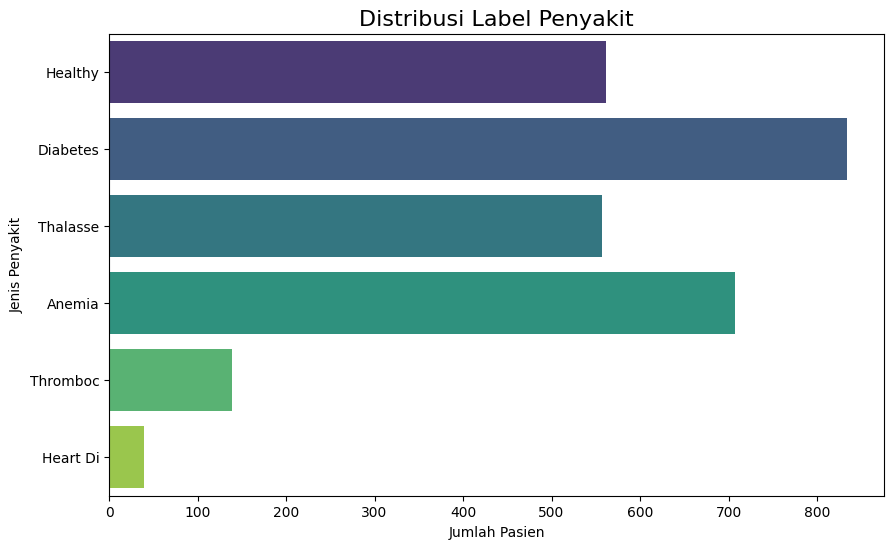

In [ ]:
# Visualisasi 1: Distribusi Label (Penyakit)
plt.figure(figsize=(10, 6))
sns.countplot(y=data['Disease'], palette="viridis")
plt.title("Distribusi Label Penyakit", fontsize=16)
plt.xlabel("Jumlah Pasien")
plt.ylabel("Jenis Penyakit")
plt.show()

**Contoh : Diagnosis Diabetes**
Dataset mengandung berbagai fitur kesehatan pasien, seperti Glukosa, BMI, Tekanan Darah, Insulin, dan Hemoglobin. Target variabel adalah apakah pasien menderita diabetes (1) atau tidak (0).
- Korelasi Positif Kuat : Glukosa dan HbA1c (Hemoglobin A1c) memiliki korelasi positif kuat (~0.8). Kedua fitur ini sama-sama mencerminkan kadar gula darah pasien, di mana nilai HbA1c mengukur gula darah jangka panjang, sedangkan Glukosa mencerminkan kadar gula saat pemeriksaan. Hubungan yang erat menunjukkan bahwa kedua fitur memberikan informasi yang serupa.
- Korelasi Positif Rendah : Tekanan Darah dan Glukosa memiliki korelasi rendah (~0.2). Fitur dengan korelasi rendah sering kali tetap dipertahankan karena dapat memberikan informasi unik yang mungkin tidak dimiliki fitur lain, terutama jika ada interaksi non-linear

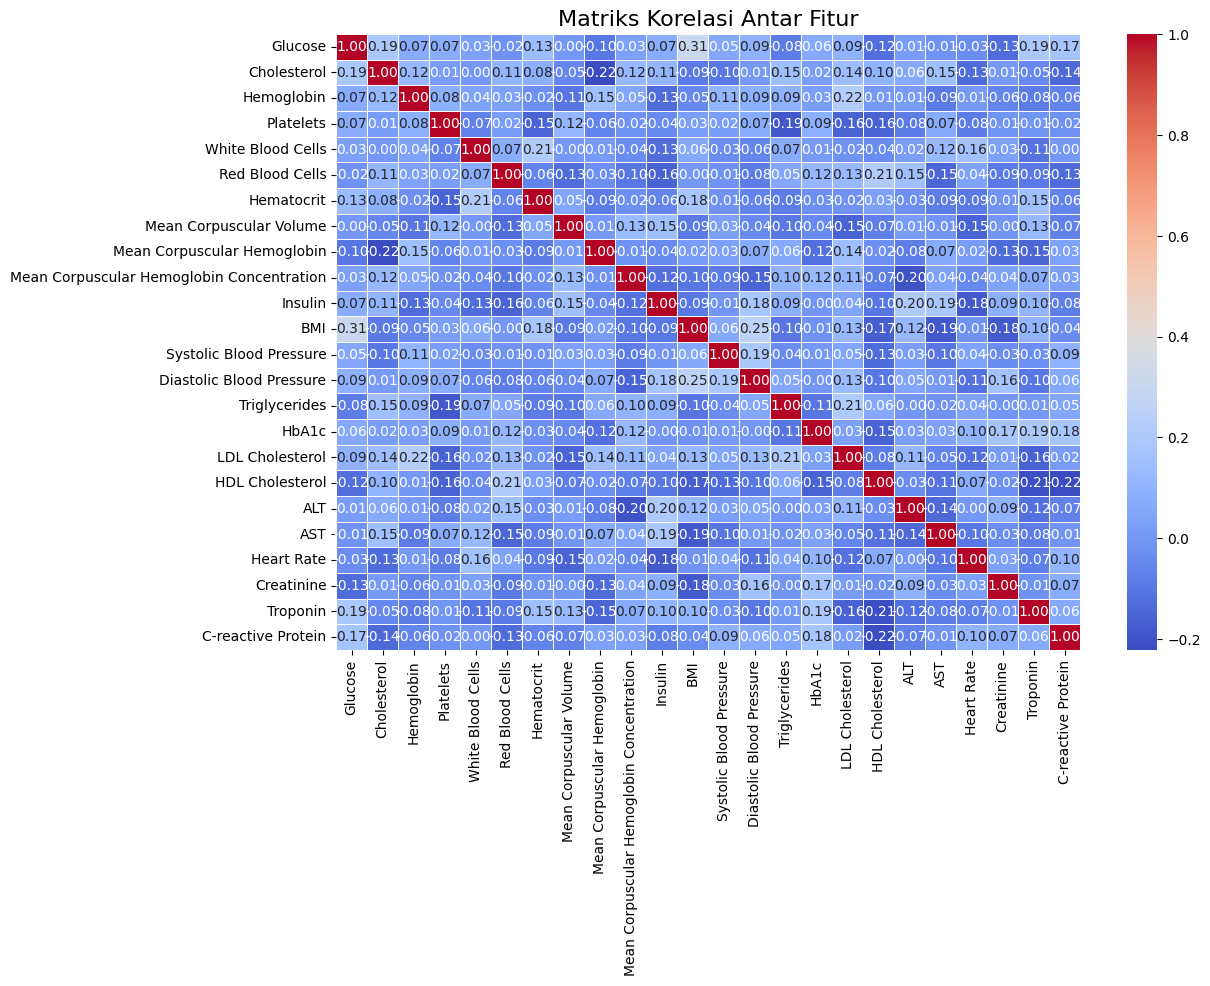

In [ ]:
# Visualisasi 2: Korelasi Antar Fitur
# Memilih hanya kolom numerik
numeric_data = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Antar Fitur", fontsize=16)
plt.show()

**4. Train-Test Split & Train Model**

**n_estimators=100** : Menentukan jumlah trees (pohon keputusan) yang akan digunakan dalam ensemble model Random Forest. Semakin banyak pohon maka hasil prediksi akan lebih stabil dan akurat.

In [ ]:
# Memeriksa data kosong untuk dataset
print("Missing values in Dataset:")
print(balanced_data.isnull().sum())

print("Missing values in Dataset test:")
print(test_data.isnull().sum())

Missing values in Dataset:
Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                       

In [ ]:
# Features and target
X = data.drop(columns=['Disease'])  # Drop target column
y = data['Disease']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**5. Model Evaluation**

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9577464788732394
Classification Report:
               precision    recall  f1-score   support

      Anemia       1.00      0.94      0.97       141
    Diabetes       0.87      1.00      0.93       166
     Healthy       1.00      1.00      1.00       119
    Heart Di       1.00      0.12      0.22         8
    Thalasse       1.00      0.96      0.98       110
    Thromboc       1.00      0.83      0.91        24

    accuracy                           0.96       568
   macro avg       0.98      0.81      0.84       568
weighted avg       0.96      0.96      0.95       568



**6. Feature Importance Visualization**

Melakukan analisis pentingnya fitur (feature importance) sangat penting dalam pembelajaran mesin karena membantu utnuk memahami bagaimana model menggunakan data untuk membuat prediksi.

Digunakan untuk Mengoptimalkan model : Menghapus fitur yang tidak signifikan (dengan importance score rendah) dapat menyederhanakan model, mengurangi kompleksitas, dan meningkatkan efisiensi tanpa mengurangi akurasi.

<ipython-input-8-ff74a90a51e6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")


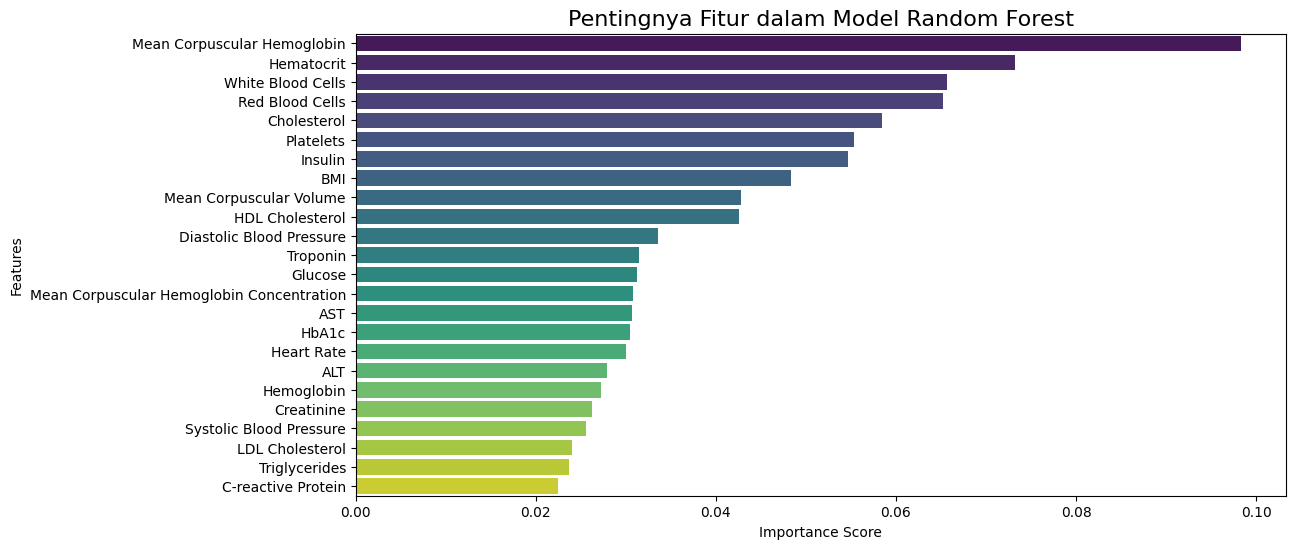

In [ ]:
# Visualisasi 3: Pentingnya Fitur (Feature Importance)
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")
plt.title("Pentingnya Fitur dalam Model Random Forest", fontsize=16)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

**7. Confusion Matrix Visualization**

<Figure size 800x600 with 0 Axes>

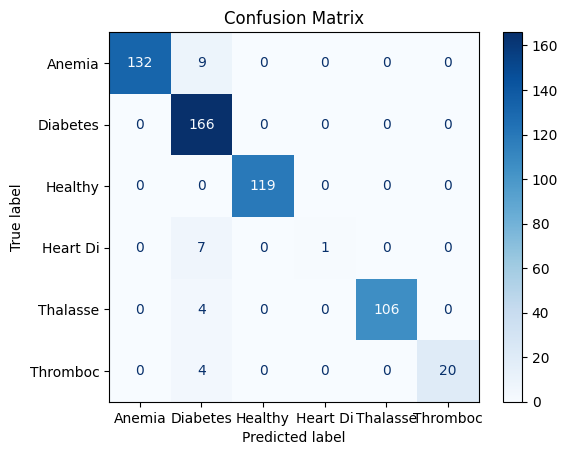

In [ ]:
# Visualisasi 4: Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

**8. Data Distribution Per Feature**

**X-axis :** Kategori penyakit (misalnya: Healthy, Diabetes, Thalasse, Anemia, Thromboc, Heart Di).

**Y-axis :** Nilai fitur (misalnya: Glucose, Cholesterol, Hemoglobin, Platelets).

contoh :
- Pada Sebaran Glucose Berdasarkan Penyakit, Q1 untuk pasien diabetes lebih tinggi dibandingkan pasien sehat, menunjukkan kadar glukosa lebih tinggi pada pasien diabetes.
- Median glukosa untuk pasien diabetes jauh lebih tinggi daripada pasien sehat, menekankan bahwa kadar glukosa tinggi adalah ciri khas diabetes.
- Pada boxplot, Q3 untuk pasien diabetes terlihat lebih tinggi dibandingkan Q3 untuk kategori penyakit lainnya (terutama pasien sehat).

Hal ini mengindikasikan kadar glukosa yang sangat tinggi sering terjadi pada pasien diabetes.

<ipython-input-10-dafbc15dd776>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Disease", y=col, palette="Set2")
<ipython-input-10-dafbc15dd776>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Disease", y=col, palette="Set2")
<ipython-input-10-dafbc15dd776>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Disease", y=col, palette="Set2")
<ipython-input-10-dafbc15dd776>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable

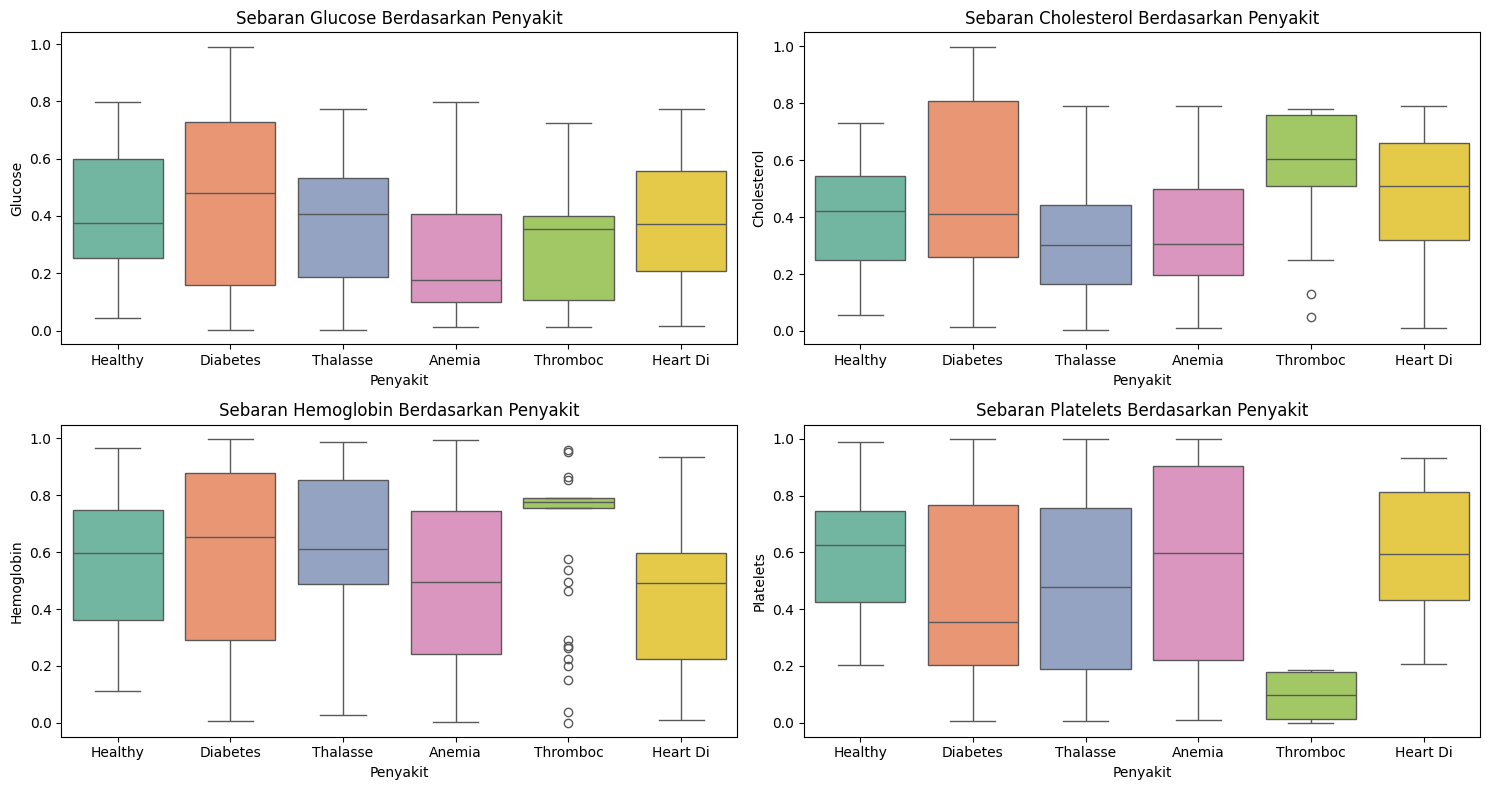

In [ ]:
# Visualisasi 5: Sebaran Data Per Fitur
plt.figure(figsize=(15, 8))
for i, col in enumerate(X.columns[:4]):  # Visualisasikan fitur pertama hingga keempat
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=data, x="Disease", y=col, palette="Set2")
    plt.title(f"Sebaran {col} Berdasarkan Penyakit")
    plt.xlabel("Penyakit")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**9. Create Ontology**

Dua kelas utama didefinisikan: Symptom (Gejala) dan Disease (Penyakit). Kelas Thing adalah kelas dasar dalam ontologi yang merupakan entitas umum. Kelas Symptom dan Disease mewakili kategori atau jenis entitas dalam sistem diagnosis.


has_symptom menghubungkan relasi antara Gejala dengan Penyakit. Ini berarti suatu gejala dapat terkait dengan satu atau lebih penyakit.

**Random Forest** dapat digunakan untuk memprediksi penyakit berdasarkan data fitur medis (seperti kadar glukosa, hemoglobin, dll.).

**Ontologi** dapat memperkaya hasil prediksi dengan memverifikasi relasi antara gejala dan penyakit berdasarkan pengetahuan domain yang sudah dimasukkan dalam ontologi.

In [ ]:
# Step 4: Create Ontology
onto = get_ontology("http://example.org/diagnosis.owl")

with onto:
    # Define classes
    class Symptom(Thing): pass
    class Disease(Thing): pass
    class has_symptom(Symptom >> Disease): pass

    # Add instances of diseases and symptoms
    fever = Symptom("Fever")
    high_glucose = Symptom("High_Glucose")
    low_hemoglobin = Symptom("Low_Hemoglobin")

    diabetes = Disease("Diabetes")
    anemia = Disease("Anemia")
    thalasse = Disease("Thalasse")
    healthy = Disease("Healthy")

    # Define relationships
    has_symptom[diabetes] = [high_glucose]
    has_symptom[anemia] = [low_hemoglobin]
    has_symptom[thalasse] = [low_hemoglobin, fever]

# Save the ontology
onto.save(file="diagnosis_ontology.owl")

**10. Diagnosis Function**

In [ ]:
import pandas as pd

# Jika dataset uji (X_test) adalah DataFrame pandas

print(X_test)

       Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
415   0.399017     0.508254    0.777394   0.096310           0.925520   
1596  0.389399     0.462404    0.480595   0.228912           0.781088   
1322  0.320138     0.442105    0.331686   0.171060           0.990786   
2271  0.320138     0.442105    0.331686   0.171060           0.990786   
1966  0.582278     0.114633    0.846266   0.736968           0.487405   
...        ...          ...         ...        ...                ...   
163   0.407043     0.248231    0.295620   0.055934           0.044499   
1885  0.407101     0.124738    0.983306   0.663867           0.361113   
252   0.601246     0.012139    0.077618   0.999393           0.785517   
1776  0.729868     0.905026    0.520473   0.306955           0.743164   
1644  0.023959     0.191150    0.201433   0.533962           0.047183   

      Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
415          0.652505    0.684896                 0.380656   

In [ ]:
# Step 5: Function for Diagnosis
def diagnose(patient_features):
    # Predict with the model
    predicted_disease = model.predict([patient_features])[0]
    print(f"Predicted Disease: {predicted_disease}")

    # Ontology reasoning
    disease_instances = onto.search(iri=f"*{predicted_disease}")
    if disease_instances:
        disease_instance = disease_instances[0]
        print(f"Related symptoms (from ontology): {disease_instance.has_symptom}")
    else:
        print(f"Warning: Disease '{predicted_disease}' not found in ontology.")

    return predicted_disease

# Example Diagnosis
sample_patient = X_test.iloc[8].values  # Use the first patient in the test set
diagnose(sample_patient)

# Debugging Ontology
print("Available diseases in ontology:", list(onto.classes()))

Predicted Disease: Anemia
Related symptoms (from ontology): [diagnosis.Low_Hemoglobin]
Available diseases in ontology: [diagnosis.Symptom, diagnosis.Disease]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
